 データ前処理

1. 欠損値処理
2. 外れ値検出と処理
3. データの標準化・正規化
4. データの型変換
5. テキストデータの前処理


In [1]:
# 1. 欠損値処理 (平均値補完、前後データ補完、削除)
import pandas as pd
import numpy as np

# サンプルデータ作成
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, 4, np.nan]}
df = pd.DataFrame(data)

# 平均値補完
df_mean = df.fillna(df.mean())
# 前のデータで補完
df_ffill = df.fillna(method='ffill')
# 欠損値を含む行を削除
df_drop = df.dropna()

print('元のデータ:\n', df)
print('平均値補完:\n', df_mean)
print('前のデータで補完:\n', df_ffill)
print('欠損値を含む行の削除:\n', df_drop)

元のデータ:
      A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  4.0
4  5.0  NaN
平均値補完:
      A    B
0  1.0  3.0
1  2.0  2.0
2  3.0  3.0
3  4.0  4.0
4  5.0  3.0
前のデータで補完:
      A    B
0  1.0  NaN
1  2.0  2.0
2  2.0  3.0
3  4.0  4.0
4  5.0  4.0
欠損値を含む行の削除:
      A    B
1  2.0  2.0
3  4.0  4.0


In [2]:
# 2. 外れ値検出と処理 (IQR法, Zスコア)
from scipy import stats

# IQR法による外れ値検出
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Zスコアによる外れ値検出
z_scores = np.abs(stats.zscore(df.fillna(0)))
df_zscore = df[(z_scores < 3).all(axis=1)]

print('IQR法による外れ値除去:\n', df_no_outliers)
print('Zスコアによる外れ値除去:\n', df_zscore)

IQR法による外れ値除去:
      A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  4.0
4  5.0  NaN
Zスコアによる外れ値除去:
      A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  4.0
4  5.0  NaN


In [3]:
# 3. データの標準化・正規化 (Min-Maxスケーリング, Zスコア正規化)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Maxスケーリング
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df.fillna(0)), columns=df.columns)

# Zスコア正規化
scaler_zscore = StandardScaler()
df_zscore_scaled = pd.DataFrame(scaler_zscore.fit_transform(df.fillna(0)), columns=df.columns)

print('Min-Maxスケーリング:\n', df_minmax)
print('Zスコア正規化:\n', df_zscore_scaled)

Min-Maxスケーリング:
      A     B
0  0.2  0.00
1  0.4  0.50
2  0.0  0.75
3  0.8  1.00
4  1.0  0.00
Zスコア正規化:
           A      B
0 -0.754829 -1.125
1 -0.215666  0.125
2 -1.293993  0.750
3  0.862662  1.375
4  1.401826 -1.125


In [4]:
# 4. データの型変換 (カテゴリデータのOne-Hotエンコーディング)
df_cat = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})

# One-Hotエンコーディング
df_encoded = pd.get_dummies(df_cat)

print('元のカテゴリデータ:\n', df_cat)
print('One-Hotエンコーディング後:\n', df_encoded)

元のカテゴリデータ:
    Color
0    Red
1   Blue
2  Green
3   Blue
4    Red
One-Hotエンコーディング後:
    Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True


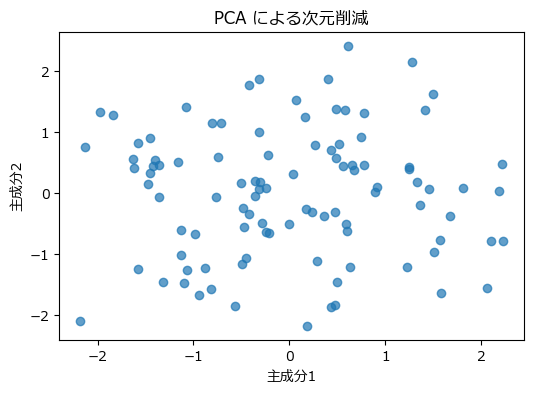

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Meiryo'
#  主成分分析（PCA）
# データの生成
X_pca = np.random.rand(100, 5) * 10  # 5次元データ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# PCAの適用
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# 可視化
plt.figure(figsize=(6, 4))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.7)
plt.title("PCA による次元削減")
plt.xlabel("主成分1")
plt.ylabel("主成分2")
plt.show()